In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import numpy as np

In [5]:
cols = (list(range(0, 187)) + ['Category'])
train_data = pd.read_csv(r"D:\FCAI\NTI\Tech\Day_6\mitbih_train.csv\mitbih_train.csv", names=cols)
test_data = pd.read_csv(r"D:\FCAI\NTI\Tech\Day_6\mitbih_test.csv\mitbih_test.csv", names=cols)

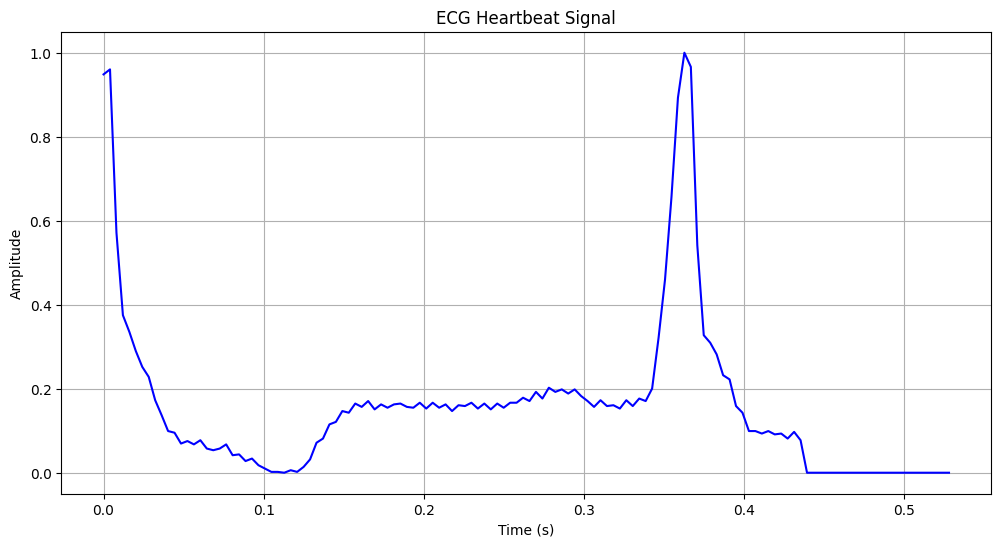

In [34]:
ecg_data = train_data.iloc[22222].values
time = np.linspace(0, len(ecg_data) / 250, len(ecg_data))

plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data, color='b')
plt.title('ECG Heartbeat Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [65]:
# start_index = 120
# end_index = 186

# columns_to_drop = list(range(start_index, end_index + 1))

# train_data = train_data.drop(train_data.columns[columns_to_drop], axis=1)
# test_data = test_data.drop(test_data.columns[columns_to_drop], axis=1)

In [7]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Category
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Category
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
print(train_data.shape)
print(test_data.shape)

(87554, 188)
(21892, 188)


In [10]:
train_data['is_class_0'] = train_data['Category'].apply(lambda x: 1 if x == 0 else 0)
X_train = train_data.drop(columns=['Category', 'is_class_0'])
y_train = train_data['is_class_0']

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# model1 = LogisticRegression(class_weight='balanced', max_iter=1000)
# model1 = RandomForestClassifier(class_weight='balanced', random_state=42)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model1 = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [13]:
cv_scores = cross_val_score(model1, X_train, y_train, cv=32)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.94519547 0.94738765 0.95467836 0.94298246 0.9630848  0.97660819
 0.98391813 0.98318713 0.97733918 0.98538012 0.98209064 0.98026316
 0.99013158 0.98172515 0.98245614 0.98099415 0.98355263 0.94225146
 0.9755117  0.98684211 0.98282164 0.99013158 0.98830409 0.98428363
 0.98574561 0.98684211 0.98538012 0.9875731  0.98976608 0.98172515
 0.98574561 0.98647661]
Mean cross-validation score: 0.9775117349332945


In [14]:
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
import joblib
joblib.dump(model1, 'binary_classification_model.pkl')

['binary_classification_model.pkl']

In [16]:
test_data['is_class_0'] = test_data['Category'].apply(lambda x: 1 if x == 0 else 0)
X_test = test_data.drop(columns=['Category', 'is_class_0'])
y_test = test_data['is_class_0']

# y_pred1 = model1.predict(X_test)
# print("Binary Classification Report:\n", classification_report(y_test, y_pred1))

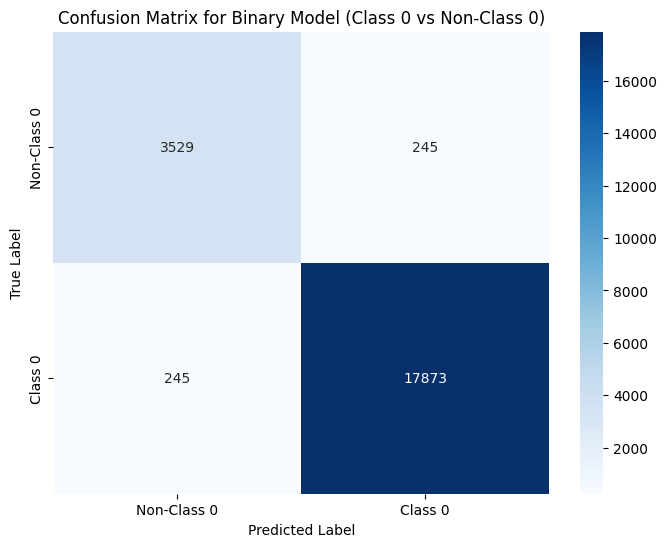

Classification Report (Binary Model):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3774
           1       0.99      0.99      0.99     18118

    accuracy                           0.98     21892
   macro avg       0.96      0.96      0.96     21892
weighted avg       0.98      0.98      0.98     21892



In [17]:
y_pred_binary = model1.predict(X_test)

cm_binary = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Class 0", "Class 0"], yticklabels=["Non-Class 0", "Class 0"])
plt.title("Confusion Matrix for Binary Model (Class 0 vs Non-Class 0)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report (Binary Model):\n", classification_report(y_test, y_pred_binary))


In [18]:
train_data_non_class_0 = train_data[train_data['Category'] != 0]

X_train_mc = train_data_non_class_0.drop(columns=['Category', 'is_class_0']) 
y_train_mc = train_data_non_class_0['Category'] - 1 

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_mc_re, y_train_mc_re = smote.fit_resample(X_train_mc, y_train_mc)

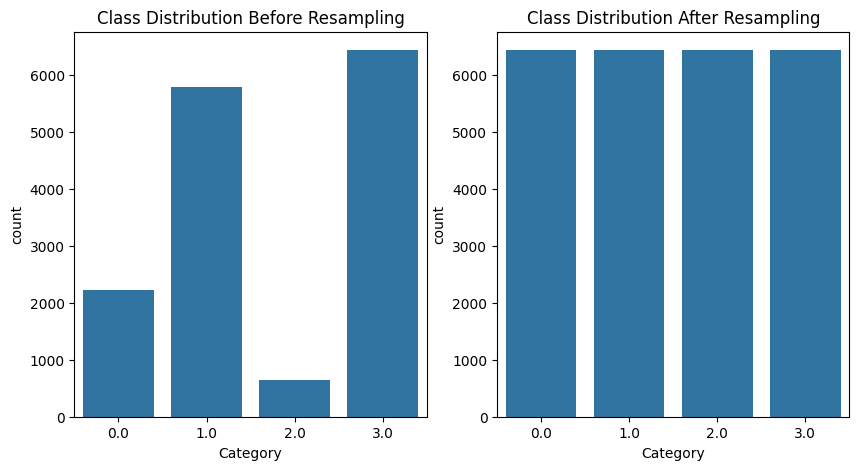

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_mc)
plt.title("Class Distribution Before Resampling")

# Plotting class distribution after resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_mc_re)
plt.title("Class Distribution After Resampling")

plt.show()

In [21]:
X_train_mc

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.483696,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.113122,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [22]:
classes, counts = np.unique(y_train_mc_re, return_counts=True)
class_weights = {cls: len(y_train_mc_re) / count for cls, count in zip(classes, counts)}
sample_weights = np.array([class_weights[cls] for cls in y_train_mc_re])

In [24]:
model2 =RandomForestClassifier(class_weight='balanced', random_state=32)
# model2 = XGBClassifier(objective='multi:softmax', num_class=len(classes))

In [25]:
cv_scores_mc = cross_val_score(model2, X_train_mc_re, y_train_mc_re, cv=32)
print(f"Cross-validation scores: {cv_scores_mc}")
print(f"Mean cross-validation score: {cv_scores_mc.mean()}")

Cross-validation scores: [0.98507463 0.9800995  0.9800995  0.98880597 0.99129353 0.98383085
 0.97885572 0.99004975 0.99253731 0.98631841 0.98880597 0.99253731
 0.99378109 0.99004975 0.99626866 0.98507463 0.99004975 0.98631841
 0.9800995  0.98756219 0.98507463 0.99253731 0.98258706 0.98631841
 0.99129353 0.99378109 0.99129353 0.99253731 0.98630137 0.99377335
 0.99626401 0.99501868]
Mean cross-validation score: 0.9885716479092705


In [26]:
model2.fit(X_train_mc_re, y_train_mc_re, sample_weight=sample_weights)

RandomForestClassifier(class_weight='balanced', random_state=32)

In [27]:
import joblib
joblib.dump(model2, 'multiclass_classification_model.pkl')

['multiclass_classification_model.pkl']

In [28]:
test_data_non_class_0 = test_data[test_data['is_class_0'] == 0]

X_test_mc = test_data_non_class_0.drop(columns=['Category', 'is_class_0']) 
y_test_mc = test_data_non_class_0['Category'] - 1

In [29]:
# X_test_mc

In [30]:
# y_pred_multiclass

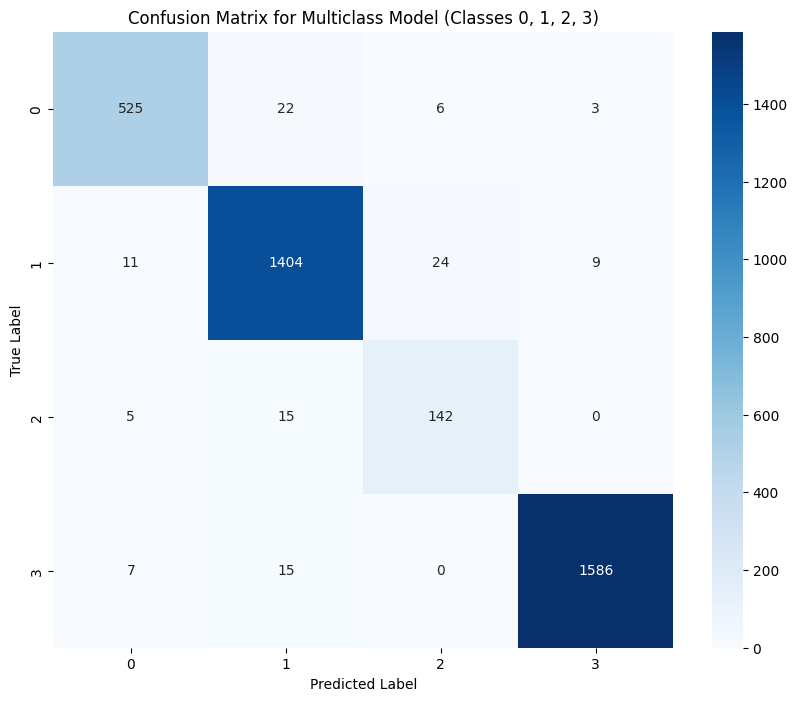

Classification Report (Multiclass Model):
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       556
         1.0       0.96      0.97      0.97      1448
         2.0       0.83      0.88      0.85       162
         3.0       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.94      0.94      0.94      3774
weighted avg       0.97      0.97      0.97      3774



In [31]:
y_pred_multiclass = model2.predict(X_test_mc)

cm_multiclass = confusion_matrix(y_test_mc, y_pred_multiclass)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_multiclass, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix for Multiclass Model (Classes 0, 1, 2, 3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report (Multiclass Model):\n", classification_report(y_test_mc, y_pred_multiclass))


* # **Convert Png Heartbeat Signal To Features**

In [209]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [245]:
image_path = '/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N10109.png'

image = Image.open(image_path)
# image = image.convert('L')  
image = np.array(image)

In [246]:
image.shape

(288, 432, 4)

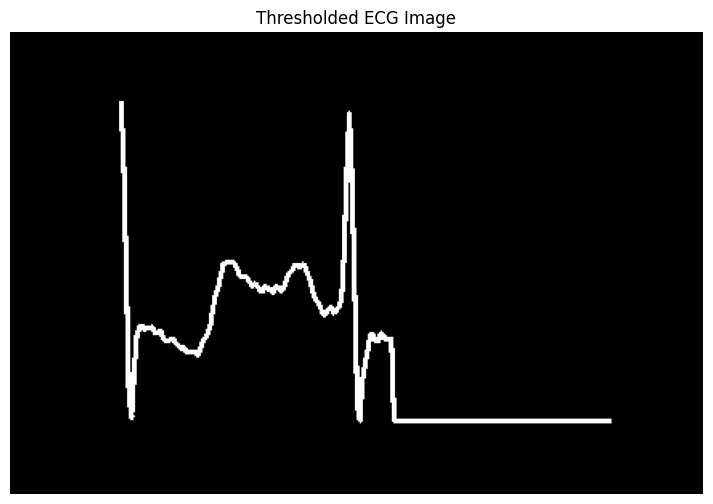

In [247]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adaptive thresholding (can handle varying lighting and contrast)
_, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 6))
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded ECG Image')
plt.axis('off')
plt.show()

In [248]:
signal_pixels = []
for x in range(thresholded.shape[1]):
    y = np.argmax(thresholded[:, x])
    if thresholded[y, x] == 255:  # Only consider if the pixel is white
        signal_pixels.append(y)

signal_data = np.array(signal_pixels)

In [249]:
signal_data

array([ 43,  43,  43,  60,  84, 127, 171, 212, 203, 189, 186, 183, 182,
       182, 182, 182, 183, 183, 183, 183, 182, 183, 184, 186, 185, 185,
       185, 186, 189, 191, 191, 190, 190, 190, 190, 191, 193, 194, 195,
       195, 195, 196, 197, 198, 198, 198, 198, 198, 198, 196, 193, 191,
       190, 188, 185, 182, 175, 170, 164, 161, 158, 153, 149, 144, 143,
       143, 142, 142, 142, 142, 142, 142, 143, 144, 146, 148, 151, 151,
       151, 151, 152, 153, 155, 156, 155, 156, 156, 158, 159, 158, 157,
       157, 158, 158, 159, 159, 158, 157, 157, 158, 158, 158, 155, 152,
       150, 149, 148, 146, 144, 144, 144, 144, 144, 144, 143, 144, 144,
       146, 149, 152, 154, 158, 162, 165, 167, 168, 170, 173, 173, 172,
       171, 170, 170, 171, 172, 171, 168, 160, 142, 114,  84,  62,  50,
        49,  50,  60,  85, 122, 164, 208, 215, 209, 203, 198, 192, 188,
       187, 187, 187, 188, 190, 188, 187, 186, 187, 188, 189, 190, 190,
       190, 190, 197, 228, 241, 241, 241, 241, 241, 241, 241, 24

In [250]:
min_value = np.min(signal_data)
max_value = np.max(signal_data)
normalized_signal_data = 1-((signal_data - min_value) / (max_value - min_value))

In [251]:
num_features = 187
if len(normalized_signal_data) > num_features:
    indices = np.linspace(0, len(normalized_signal_data) - 1, num_features).astype(int)
    extracted_features = normalized_signal_data[indices]
else:
    extracted_features = normalized_signal_data

In [252]:
print("Extracted Features:")
print(extracted_features)
print(len(extracted_features))

Extracted Features:
[1.         1.         0.91414141 0.79292929 0.35353535 0.19191919
 0.26262626 0.29292929 0.2979798  0.2979798  0.29292929 0.29292929
 0.29292929 0.29292929 0.27777778 0.28282828 0.28282828 0.27777778
 0.25252525 0.25757576 0.25757576 0.25757576 0.24242424 0.23737374
 0.23232323 0.22727273 0.22222222 0.21717172 0.21717172 0.21717172
 0.22727273 0.25252525 0.25757576 0.28282828 0.2979798  0.35858586
 0.4040404  0.41919192 0.46464646 0.49494949 0.49494949 0.5
 0.5        0.5        0.49494949 0.47979798 0.46969697 0.45454545
 0.45454545 0.44949495 0.43434343 0.42929293 0.42929293 0.41919192
 0.41414141 0.42424242 0.41919192 0.41919192 0.41414141 0.42424242
 0.42424242 0.41919192 0.43434343 0.44949495 0.46464646 0.46969697
 0.48989899 0.48989899 0.48989899 0.48989899 0.48989899 0.48989899
 0.46464646 0.43939394 0.41919192 0.38383838 0.36868687 0.35858586
 0.34343434 0.34848485 0.35858586 0.35353535 0.34848485 0.36868687
 0.5        0.64141414 0.9040404  0.96969697 0.96

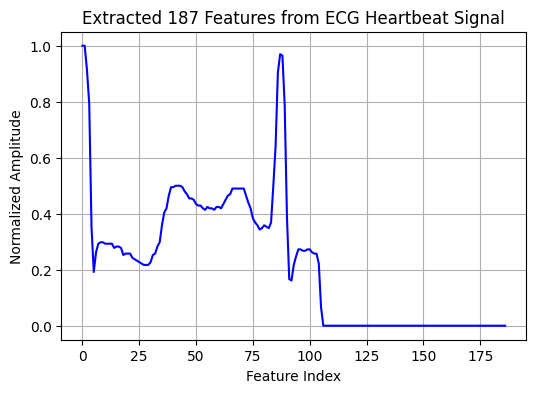

In [253]:
plt.figure(figsize=(6, 4))
plt.plot(extracted_features, color='b')
plt.title('Extracted 187 Features from ECG Heartbeat Signal')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Amplitude')
plt.grid()
plt.show()

In [254]:
import pickle
import numpy as np

model_B = joblib.load('/kaggle/working/binary_classification_model.pkl')
model_M = joblib.load('/kaggle/working/multiclass_classification_model.pkl')

In [255]:
test_sample = extracted_features.reshape(1,-1)

In [256]:
test_sample

array([[1.        , 1.        , 0.91414141, 0.79292929, 0.35353535,
        0.19191919, 0.26262626, 0.29292929, 0.2979798 , 0.2979798 ,
        0.29292929, 0.29292929, 0.29292929, 0.29292929, 0.27777778,
        0.28282828, 0.28282828, 0.27777778, 0.25252525, 0.25757576,
        0.25757576, 0.25757576, 0.24242424, 0.23737374, 0.23232323,
        0.22727273, 0.22222222, 0.21717172, 0.21717172, 0.21717172,
        0.22727273, 0.25252525, 0.25757576, 0.28282828, 0.2979798 ,
        0.35858586, 0.4040404 , 0.41919192, 0.46464646, 0.49494949,
        0.49494949, 0.5       , 0.5       , 0.5       , 0.49494949,
        0.47979798, 0.46969697, 0.45454545, 0.45454545, 0.44949495,
        0.43434343, 0.42929293, 0.42929293, 0.41919192, 0.41414141,
        0.42424242, 0.41919192, 0.41919192, 0.41414141, 0.42424242,
        0.42424242, 0.41919192, 0.43434343, 0.44949495, 0.46464646,
        0.46969697, 0.48989899, 0.48989899, 0.48989899, 0.48989899,
        0.48989899, 0.48989899, 0.46464646, 0.43

In [260]:
predictions = model_B.predict(test_sample)
print(predictions)

[1]


In [261]:
predictions_M = model_M.predict(test_sample)
print(predictions_M)

[3.]


In [262]:
if predictions == 1 :
    print ("Normal beat")
    
else :
    predictions_M = model_M.predict(test_sample)
    if predictions_M == 0 : 
        print ("Supraventricular beat")
    elif predictions_M == 1 : 
        print ("Ventricular beat")
    elif predictions_M == 2 : 
        print ("Fusion beat")
    elif predictions_M == 3 : 
        print ("Unknown beat")

Normal beat
